In [96]:
# Load the data file
import os
 
if not os.path.exists('JCEE_Result.csv'):
    !wget https://raw.githubusercontent.com/Frankkao813/Python/b0525b9872dea47c9face821b690f0c5e5d97612/DataAnalysis/JCEE_Result.csv

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('JCEE_Result.csv', sep = ",")
print(df.info())
print(len(df.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   編號      28 non-null     int64 
 1   性別      28 non-null     int64 
 2   國文成績    28 non-null     object
 3   英語成績    28 non-null     object
 4   數學成績    28 non-null     object
 5   自然科成績   28 non-null     object
 6   社會科成績   28 non-null     object
 7   作文成績    28 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 1.9+ KB
None
28


In [128]:
class CAPanalysis:
    def __init__(self, data, nameConversion):
        myMap = {'A++':7, "A+": 6, "A": 5, "B++": 4, "B+": 3, "B": 2, "C":1}
        self.data = data
        self.df_score = self.data.applymap(lambda s: myMap.get(s) if s in myMap else s)
        self.subject_nameConversion = nameConversion
        

    def show_gender(self):
        numGender = self.data['性別'].value_counts().to_dict()
        label = []
        num_people = []
        for key, value in numGender.items():
            label_conversion ={1: "Male", 0: "Female"}
            label.append(label_conversion.get(key,0))
            num_people.append(value)
        plt.title("Gender distribution in the data")
        plt.pie(num_people, labels = label)
        plt.show()  

    def subjectGraph(self, subject_name):
        numCount = self.data[subject_name].value_counts().reindex(['C','B','B+','B++',"A", 'A+','A++'])


        gradeList = [["A++", "A+", "A"], ["B++", "B+", "B"],['C']]
        distributionDict = self.data[subject_name].value_counts().reindex(['C','B','B+','B++',"A", 'A+','A++']).to_dict()
        count = [0,0,0]
        i = 0
        for grades in gradeList:
            for grade in grades:
                letter = grade
                count[i] += distributionDict.get(letter, 0)
            i += 1
        labels = "A", "B", "C"
        
        plt.subplot(1,2,1)
        numCount_graph = numCount.plot.pie(title= self.subject_nameConversion.get(subject_name[0:2],0) + " test score")
        numCount_graph.set_ylabel('percentage of people')
        
        plt.subplot(1,2,2)
        plt.pie(count,labels = labels)
        plt.title("letter grade distribution")
        plt.show()
        
        return count
       

    def composition_score(self):
        comp_score_distribution = self.data["作文成績"].value_counts().reindex([i for i in range(0,7)])
        comp_score_distribution.plot.pie(title = "composition score plot")
        plt.xlabel("score")
        plt.ylabel("number of people")
        plt.show()

    def mappingToScore(self):
        self.df_score['total'] = self.df_score.iloc[:,2:7].sum(axis=1)
        # show the highest five people
        self.df_score.sort_values("total", ascending=False, inplace= True)
        return self.df_score.head()
    
    def correlation(self, sjt1, sjt2): #subject1, 2
        subject1 = self.df_score[sjt1]
        subject2 = self.df_score[sjt2]
        plt.scatter(subject1, subject2)
        plt.xlabel(self.subject_nameConversion.get(sjt1[0:2],0))
        plt.ylabel(self.subject_nameConversion.get(sjt2[0:2],0))
        plt.title(f"corrlation between {self.subject_nameConversion.get(sjt1[0:2],0)} and {self.subject_nameConversion.get(sjt2[0:2],0)}")
        plt.show()

        

    

### Exploratory data analysis
1. In this dataset, the number of male is higher.

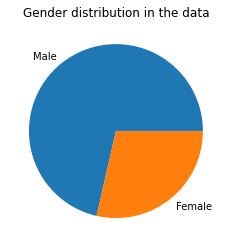

In [129]:
conversion = {"國文": "Chinese", "英語": "English", "數學": "Math", "自然": "Science", "社會": "Social Science"}
dataset1 = CAPanalysis(df, conversion)
dataset1.show_gender()



2. We want to show people who get a specific score. One can use pie chart to achieve the objective. From the data, in the subject we desired, more thean 50% of the students get the score above A, which is shown in the subplot

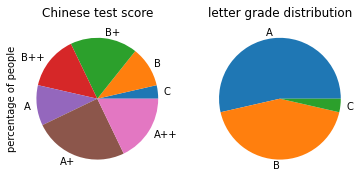

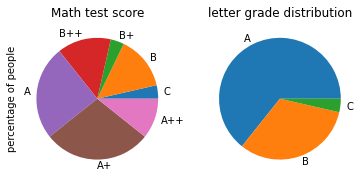

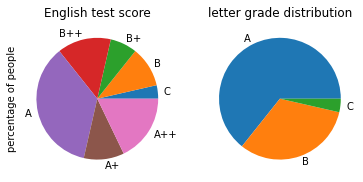

[18, 9, 1]

In [130]:
dataset1.subjectGraph("國文成績")
dataset1.subjectGraph("數學成績")
dataset1.subjectGraph("英語成績")

The grading scale of Chinese composition is different (from 0 -6); therefore, we have to treat it differently. Over half of the student get the score that is greater or equal to 5.


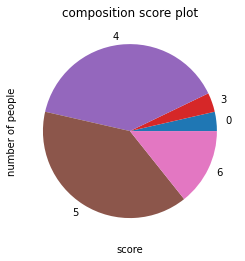

In [131]:
dataset1.composition_score()

3. In CAP test, people are graded based on A++, A+, A, B++, B+, B, C scale; however, in the school selection system, their grades will be converted into numerical scale (7 is A++, 6 is A+,etc.). We therefore have to map the letter grade to a number. We then sum up the number converted ("作文成績" column excluded) 

The highest score student get in class in 34.

In [132]:
dataset1.mappingToScore()

,編號,性別,國文成績,英語成績,數學成績,自然科成績,社會科成績,作文成績,total
21,21,1,7,7,6,7,7,5,34
15,15,1,6,7,7,7,7,4,34
8,8,1,7,6,7,7,7,5,34
3,3,0,6,7,6,7,7,6,33
4,4,0,7,7,6,5,7,6,32


4. People often say that math and science are related, which means that the ability of math and science is positively correlated. Therefore, I want to explore whether this kind of relationship exist in the data. 

Regardless of the order, one can see that there is a positive correlation between Math and Science. However, the correlation becomes less obvious when we draw correlation between Chinese and English.

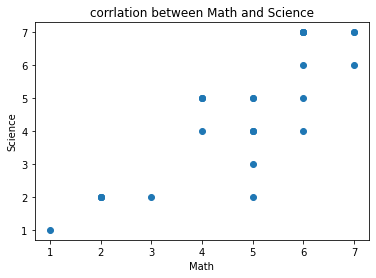

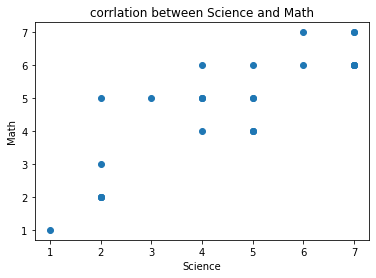

______________________________________


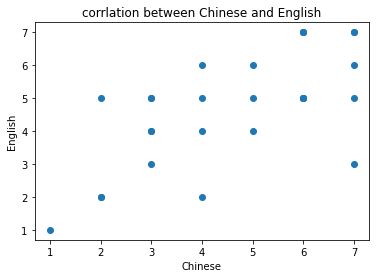

In [134]:
dataset1.correlation("數學成績", "自然科成績")
dataset1.correlation("自然科成績", "數學成績")
print("_________________________________________________")
dataset1.correlation("國文成績", "英語成績")